# Plot XY Slice (Nalu-Wind)

In [1]:
%%capture
# Important header information
naluhelperdir = '/projects/AWAKEN/lcheung/awaken.github/naluhelperscripts/'
#naluhelperdir = '/ascldap/users/lcheung/local/Git/naluhelperscripts/'

# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
from numpy import *
import pickle

from matplotlib import animation
from IPython.display import HTML
import plotSamplePlaneGUI as pplane
import avgSamplePlanes as avgplane

from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
rotorD = 127
zHH    = 90
x0     = 2000
y0     = 2560
writeoutputs = True
datadir= 'data/'

In [3]:
turbineDir   = '/pscratch/mlblayl/AWAKEN/Neutral_Turbine_Yaw'
precursorDir = '/pscratch/mlblayl/AWAKEN/Neutral_NoTurbine_Yaw'

## Plot velocity information

In [4]:
expr      = 'sqrt(velocity_probe[0]**2 + velocity_probe[1]**2)'
planenum  = 0
colormap  = 'coolwarm'
nlevels   = 101
clevels   = np.linspace(0, 10, nlevels)

In [5]:
# Load the data
planefile='Nalu_Neutral_XYslice_0D_long.dat'
noturbfile='Nalu_Neutral_NT_XYslice_0D_long.dat'
turb_avgdat, time, turb_headers=pplane.loadplanefile(turbineDir+'/'+planefile, checkcomma=False)
noturb_avgdat, time, noturb_headers=pplane.loadplanefile(precursorDir+'/'+noturbfile, checkcomma=False)
Y1,X1,Z1 = pplane.getplotplane(turb_avgdat,   planenum, 6, expr=expr, headers=turb_headers, xycol=[3,4])
Y2,X2,Z2 = pplane.getplotplane(noturb_avgdat, planenum, 6, expr=expr, headers=noturb_headers, xycol=[3,4])

(730.0, 4540.0, 2052.0, 3068.0)

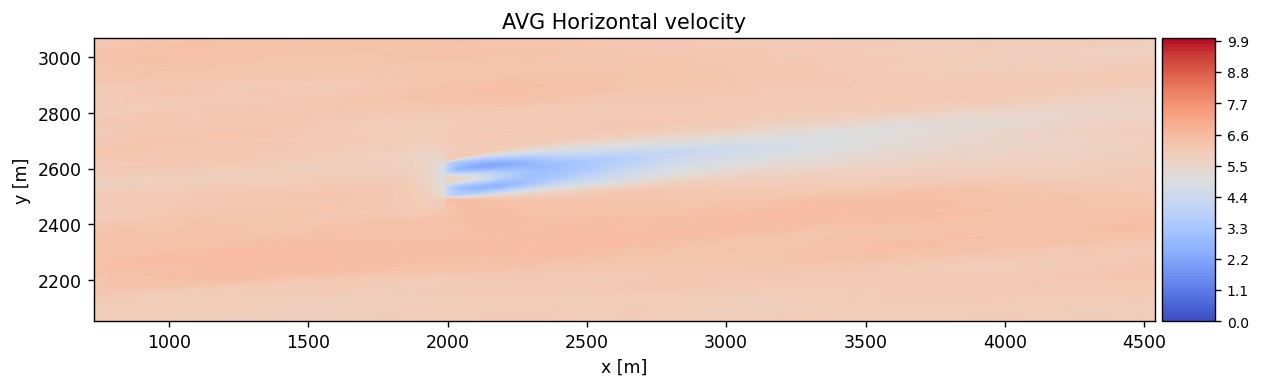

In [6]:
fig, axs = plt.subplots(1,1, figsize=(12,3), facecolor='w', dpi=125)
ax=axs
im1=ax.contourf(X1, Y1, Z1, clevels, cmap=colormap)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=fig.colorbar(im1, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=8)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('AVG Horizontal velocity')
ax.axis('scaled')

In [7]:
xm, ym = X1, Y1
xvec = xm[0,:]-x0
yvec = ym[:,0]-y0

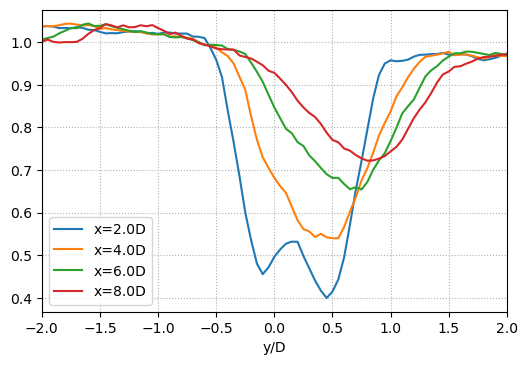

In [8]:
xtarget = [2, 4, 6, 8] 

plt.figure(figsize=(6,4), dpi=100)
for x in xtarget:
    idx = np.abs(xvec - x*rotorD).argmin()
    xD = xvec[idx]/rotorD
    plt.plot(yvec/rotorD, Z1[:,idx]/6.265, label=f'x={xD:0.1f}D')
    plt.xlim([-2, 2])
    plt.xlabel('y/D')
    plt.legend()
    plt.grid(ls=':')

In [9]:
turb_headers

['Plane_Number',
 'Index_j',
 'Index_i',
 'coordinates[0]',
 'coordinates[1]',
 'coordinates[2]',
 'velocity_probe[0]',
 'velocity_probe[1]',
 'velocity_probe[2]']

In [10]:
Y1,X1,U = pplane.getplotplane(turb_avgdat,   planenum, 6, expr='', headers=turb_headers, xycol=[3,4])
Y1,X1,V = pplane.getplotplane(turb_avgdat,   planenum, 7, expr='', headers=turb_headers, xycol=[3,4])
Y1,X1,W = pplane.getplotplane(turb_avgdat,   planenum, 8, expr='', headers=turb_headers, xycol=[3,4])

xtarget = np.arange(-10,21,1)
for x in xtarget:
    idx = np.abs(xvec - x*rotorD).argmin()
    if writeoutputs:
        xD = xvec[idx]/rotorD
        savedat = np.vstack((yvec/rotorD, U[:,idx], V[:,idx], W[:,idx],))
        fname   = f'NALUWIND_HH_VEL_PROFILE_x_{xD:06.2f}D.dat'
        np.savetxt(datadir+'/'+fname, savedat.transpose(), header="Y/D U V W")

In [ ]:
dbfile = open('test.pkl', 'wb')
pickle.dump({'X':X1, 'Y':Y1, 'U':U, 'V':V, 'W':W, }, dbfile, protocol=2)
dbfile.close()

## Plot TKE information

In [11]:
TKEexpr   = '0.5*(velocity_probe[0] + velocity_probe[1] + velocity_probe[2])'
planenum  = 0
colormap  = 'coolwarm'
nlevels   = 51
clevels   = np.linspace(0, 2.5, nlevels)

In [12]:
# Load the data
planefile='Nalu_Neutral_XYslice_0D_longUU.dat'
noturbfile='Nalu_Neutral_NT_XYslice_0D_longUU.dat'
turb_avgdat, time, turb_headers     = pplane.loadplanefile(turbineDir+'/'+planefile, checkcomma=False)
noturb_avgdat, time, noturb_headers = pplane.loadplanefile(precursorDir+'/'+noturbfile, checkcomma=False)
Y1,X1,T1 = pplane.getplotplane(turb_avgdat,   planenum, 6, expr=TKEexpr, headers=turb_headers, xycol=[3,4])
Y2,X2,T2 = pplane.getplotplane(noturb_avgdat, planenum, 6, expr=TKEexpr, headers=noturb_headers, xycol=[3,4])

(730.0, 4540.0, 2052.0, 3068.0)

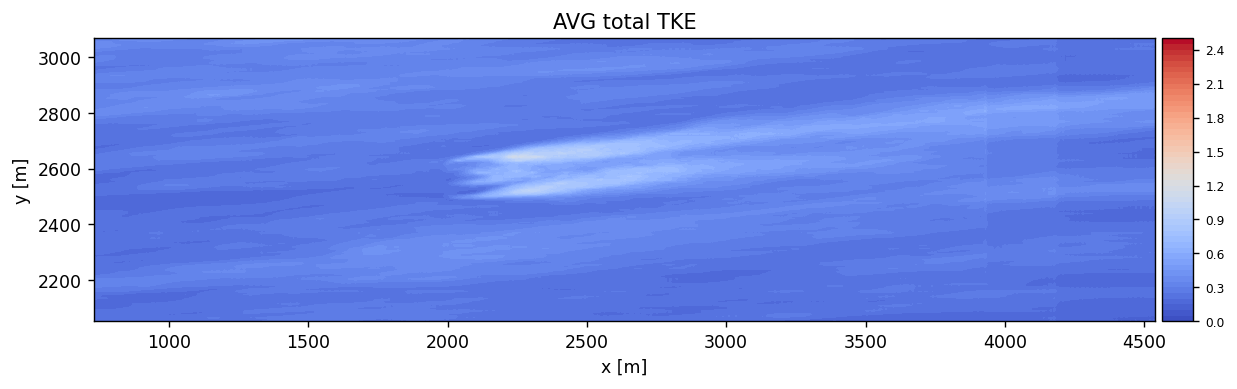

In [13]:
# Plot the turbine hub-height slice
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
klevels=np.linspace(0, 2.5,51)
iplane= 0
#TKEres = 0.5*(hhds['uu_avg'][iplane,:,:] + hhds['vv_avg'][iplane,:,:] + hhds['ww_avg'][iplane,:,:])
#TKEsgs = hhds['tke_avg'][iplane,:,:]
#TKEtot = TKEres + TKEsgs
c=plt.contourf(X1, Y1, T1, levels=klevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('AVG total TKE')
ax.axis('scaled')

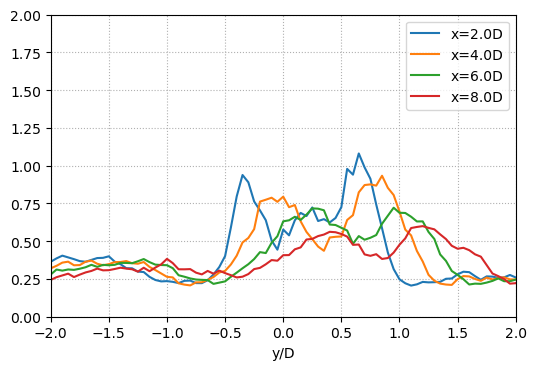

In [14]:
xtarget = [2, 4, 6, 8] 

plt.figure(figsize=(6,4), dpi=100)
for x in xtarget:
    idx = np.abs(xvec - x*rotorD).argmin()
    xD = xvec[idx]/rotorD
    plt.plot(yvec/rotorD, T1[:,idx], label=f'x={xD:0.1f}D')

plt.xlim([-2, 2])
plt.ylim([0, 2])
plt.xlabel('y/D')
plt.legend()
plt.grid(ls=':')

In [15]:
TKEres = T1

xtarget = np.arange(-10,21,1)
for x in xtarget:
    idx = np.abs(xvec - x*rotorD).argmin()
    if writeoutputs:
        xD = xvec[idx]/rotorD
        savedat = np.vstack((yvec/rotorD, TKEres[:,idx], ))
        fname   = f'NALUWIND_HH_TKE_PROFILE_x_{xD:06.2f}D.dat'
        np.savetxt(datadir+'/'+fname, savedat.transpose(), header="Y/D TKEres")